In [2]:
#Data handling and linear algebra
import numpy as np
import pandas as pd
import os

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Manipulating Data and Model Building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

#Implementation of Transfer Learning
from tensorflow.keras.applications import MobileNetV2

#Image generation and preprocessing
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Result and Performance Analysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
DIR = 'D:/leedsbutterfly/images' 

#Creating classes out of the required folders
classes = [i for i in os.listdir(DIR) if '.' not in i]                     
classes

['danaus plexippus',
 'Heliconius charitonius',
 'Heliconius erato',
 'Junonia coenia',
 'Lycaena phlaeas',
 'Nymphalis antiopa',
 'Papilio cresphontes',
 'Pieris rapae',
 'Vanessa atalanta',
 'Vanessa cardui']

In [4]:
# Create a dataframe with a column which consists of all the filepaths (without GT) and its respective label as the other column

label = []
path = []

for dirname, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               
                                 
                label.append(os.path.split(dirname)[-1])         # Append the directory name to label 
                path.append(os.path.join(dirname,filename))     # Append all the png files to path of that directory

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [5]:
df.head()

,path,label
0,D:/leedsbutterfly/images\danaus plexippus\0010...,danaus plexippus
1,D:/leedsbutterfly/images\danaus plexippus\0010...,danaus plexippus
2,D:/leedsbutterfly/images\danaus plexippus\0010...,danaus plexippus
3,D:/leedsbutterfly/images\danaus plexippus\0010...,danaus plexippus
4,D:/leedsbutterfly/images\danaus plexippus\0010...,danaus plexippus


In [6]:
df.path[0]

'D:/leedsbutterfly/images\\danaus plexippus\\0010001.png'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    832 non-null    object
 1   label   832 non-null    object
dtypes: object(2)
memory usage: 13.1+ KB


In [8]:
df['label'].value_counts()

Nymphalis antiopa         100
Heliconius charitonius     93
Junonia coenia             90
Vanessa atalanta           90
Papilio cresphontes        89
Lycaena phlaeas            88
Vanessa cardui             84
danaus plexippus           82
Heliconius erato           61
Pieris rapae               55
Name: label, dtype: int64

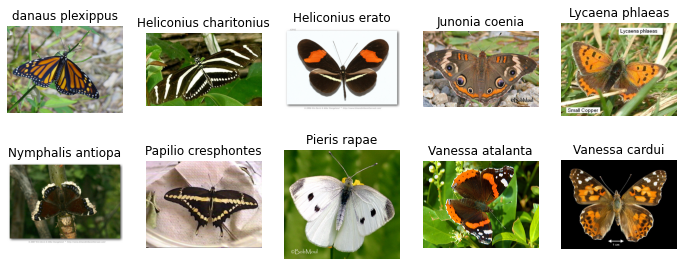

In [9]:
idx = 0
plt.figure(figsize=(12,12))
for unique_label in df['label'].unique():
    plt.subplot(5, 5, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

In [10]:
#Creating the test train split with shuffle
     

In [11]:
#Checking the shape of the newly obtained data
print(train_df.shape)
print(test_df.shape)

(665, 2)
(167, 2)


In [12]:
#Using Keras Image Data Generator to preprocess our images with the model we wish to use
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [13]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 532 validated image filenames belonging to 10 classes.
Found 133 validated image filenames belonging to 10 classes.
Found 167 validated image filenames belonging to 10 classes.


In [14]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Heliconius charitonius': 0,
 'Heliconius erato': 1,
 'Junonia coenia': 2,
 'Lycaena phlaeas': 3,
 'Nymphalis antiopa': 4,
 'Papilio cresphontes': 5,
 'Pieris rapae': 6,
 'Vanessa atalanta': 7,
 'Vanessa cardui': 8,
 'danaus plexippus': 9}

{'Heliconius charitonius': 0,
 'Heliconius erato': 1,
 'Junonia coenia': 2,
 'Lycaena phlaeas': 3,
 'Nymphalis antiopa': 4,
 'Papilio cresphontes': 5,
 'Pieris rapae': 6,
 'Vanessa atalanta': 7,
 'Vanessa cardui': 8,
 'danaus plexippus': 9}

{'Heliconius charitonius': 0,
 'Heliconius erato': 1,
 'Junonia coenia': 2,
 'Lycaena phlaeas': 3,
 'Nymphalis antiopa': 4,
 'Papilio cresphontes': 5,
 'Pieris rapae': 6,
 'Vanessa atalanta': 7,
 'Vanessa cardui': 8,
 'danaus plexippus': 9}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


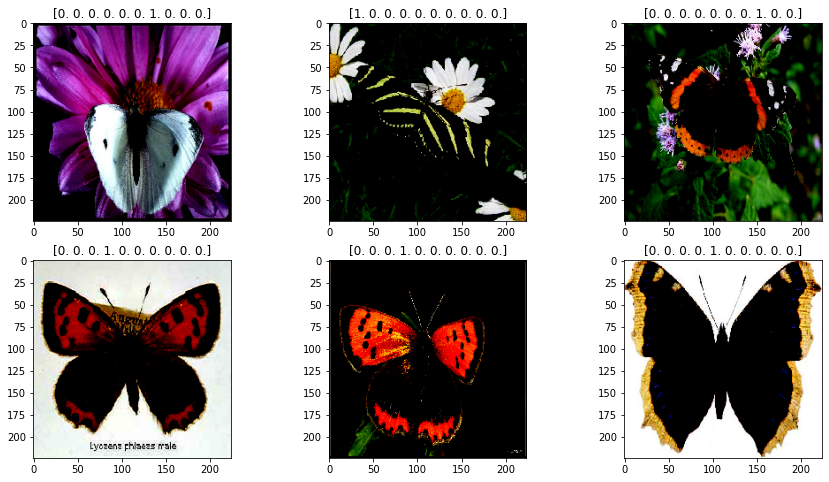

In [15]:
#Plotting images after pre-processing

fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = test_images.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j=j+1

In [16]:
#Importing our pretrained model : MobileNetV2

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [17]:
#Creating our model inputs
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=5)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [18]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.03922
Test Accuracy: 98.80%


In [19]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

6/6 [==============================] - 4s 567ms/step


In [20]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

In [21]:
# Visualize the pred_df
pred_df=pred_df.reset_index(drop=True)
pred_df.head(10)

,path,label,pred
0,D:/leedsbutterfly/images\Pieris rapae\0080008.png,Pieris rapae,Pieris rapae
1,D:/leedsbutterfly/images\Vanessa cardui\010015...,Vanessa cardui,Vanessa cardui
2,D:/leedsbutterfly/images\Junonia coenia\004010...,Junonia coenia,Junonia coenia
3,D:/leedsbutterfly/images\Papilio cresphontes\0...,Papilio cresphontes,Papilio cresphontes
4,D:/leedsbutterfly/images\Heliconius charitoniu...,Heliconius charitonius,Heliconius charitonius
5,D:/leedsbutterfly/images\Vanessa atalanta\0090...,Vanessa atalanta,Vanessa atalanta
6,D:/leedsbutterfly/images\Vanessa cardui\010015...,Vanessa cardui,Vanessa cardui
7,D:/leedsbutterfly/images\Heliconius charitoniu...,Heliconius charitonius,Heliconius charitonius
8,D:/leedsbutterfly/images\Junonia coenia\004004...,Junonia coenia,Junonia coenia
9,D:/leedsbutterfly/images\Papilio cresphontes\0...,Papilio cresphontes,Papilio cresphontes


In [22]:
# Incorrect prediction
pred_df[pred_df['label']!=pred_df['pred']]

,path,label,pred
58,D:/leedsbutterfly/images\Papilio cresphontes\0...,Papilio cresphontes,Heliconius charitonius
80,D:/leedsbutterfly/images\Vanessa cardui\010014...,Vanessa cardui,Papilio cresphontes


In [23]:
pred_df.path[60]

'D:/leedsbutterfly/images\\Vanessa cardui\\0100172.png'

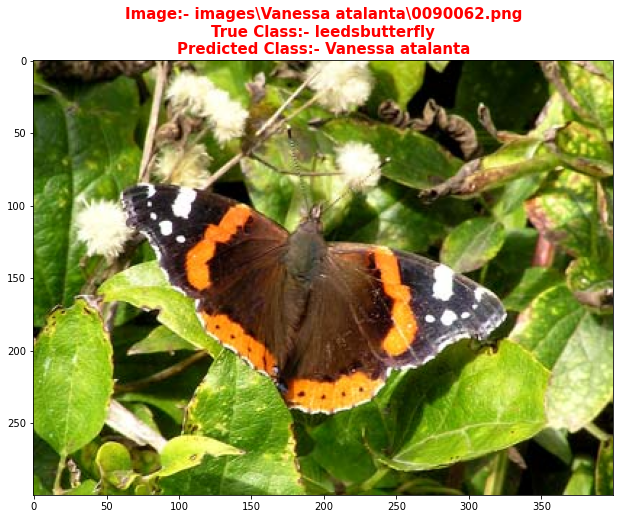

In [43]:
# Which image was it?
plt.figure(figsize=(15,8))
plt.imshow(plt.imread(pred_df.path[55]))
title1 = pred_df.path[60].split('/')[-2]
title2 = pred_df.path[60].split('/')[-1]
title3 = pred_df.pred[]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

Accuracy Score: 0.9820359281437125


<AxesSubplot:>

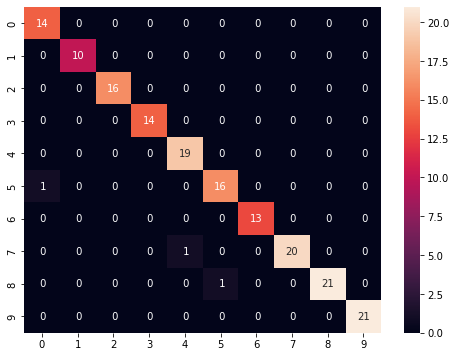

In [39]:
#Checking the accuracy score and creating a Confusion Matrix
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

In [40]:
#Generating the Classification Report for in-depth analysis
print(classification_report(pred_df['label'],pred_df['pred']))

                        precision    recall  f1-score   support

Heliconius charitonius       0.93      1.00      0.97        14
      Heliconius erato       1.00      1.00      1.00        10
        Junonia coenia       1.00      1.00      1.00        16
       Lycaena phlaeas       1.00      1.00      1.00        14
     Nymphalis antiopa       0.95      1.00      0.97        19
   Papilio cresphontes       0.94      0.94      0.94        17
          Pieris rapae       1.00      1.00      1.00        13
      Vanessa atalanta       1.00      0.95      0.98        21
        Vanessa cardui       1.00      0.95      0.98        22
      danaus plexippus       1.00      1.00      1.00        21

              accuracy                           0.98       167
             macro avg       0.98      0.98      0.98       167
          weighted avg       0.98      0.98      0.98       167

